Initializing required libraries

In [1]:
import pandas as pd 
import numpy as np  
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

%matplotlib inline

## Reading Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We have collectde it from Kaggle (Link - https://www.kaggle.com/uciml/pima-indians-diabetes-database)

**Content**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


In [2]:
url = "https://raw.githubusercontent.com/Sabila-Nawshin/ML-Playground/main/Diabetes_Prediction/diabetes.csv"
raw_data = pd.read_csv(url)

### Brief Data Exploration

Observing the first 5 rows of the dataset

In [3]:
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for null/missing values

In [ ]:
print("Number of Missing Values (in each column) in dataset")
raw_data.isna().sum()

Number of Missing Values (in each column) in dataset


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

time: 13.5 ms (started: 2021-05-20 18:28:02 +00:00)


Dataset mean, variance, standard deviation and stuff

In [17]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Heatmap of the correlation between features

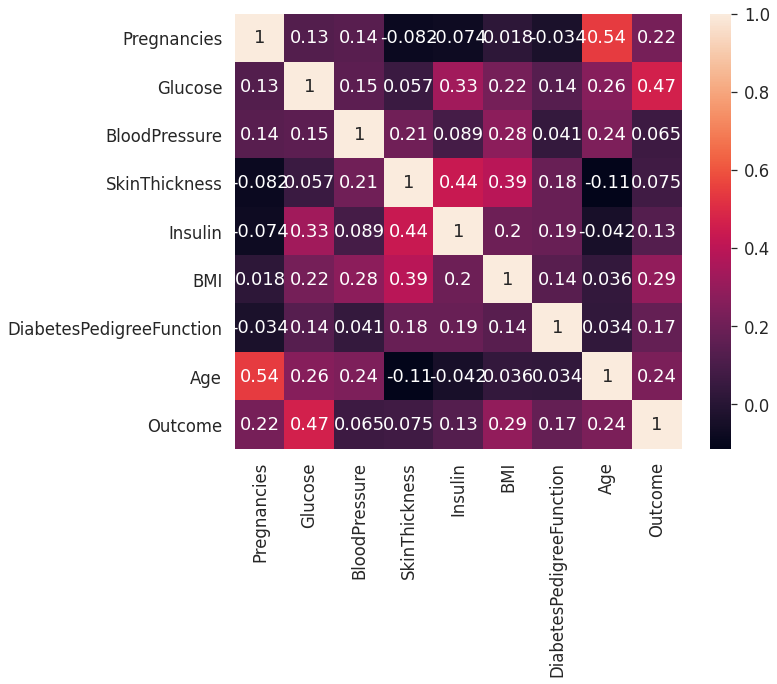

time: 1 s (started: 2021-05-20 19:20:25 +00:00)


In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(raw_data.corr(), annot=True, ax=ax)

Visualizing the features with histrogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

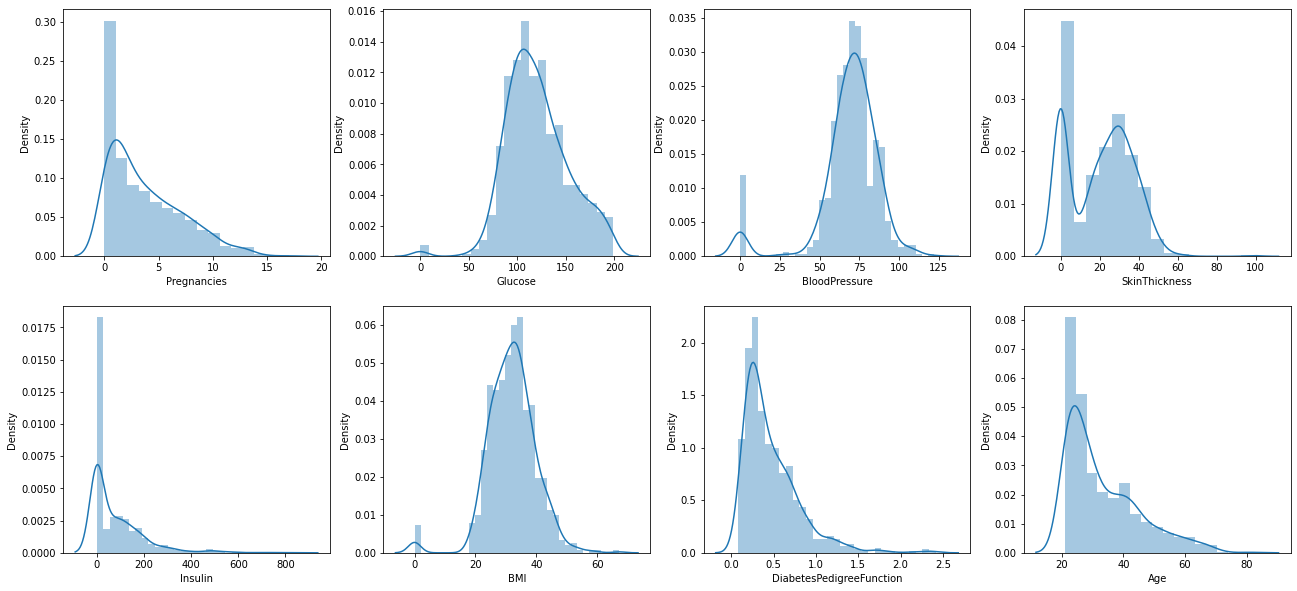

In [26]:
f, axes = plt.subplots(2,4, figsize=(22,10))
sns.distplot(raw_data.Pregnancies, ax=axes[0,0])
sns.distplot(raw_data.Glucose, ax=axes[0,1])
sns.distplot(raw_data.BloodPressure, ax=axes[0,2])
sns.distplot(raw_data.SkinThickness, ax=axes[0,3])
sns.distplot(raw_data.Insulin, ax=axes[1,0])
sns.distplot(raw_data.BMI, ax=axes[1,1])
sns.distplot(raw_data.DiabetesPedigreeFunction, ax=axes[1,2])
sns.distplot(raw_data.Age, ax=axes[1,3])

Visualizing data distribution in terms of outcome

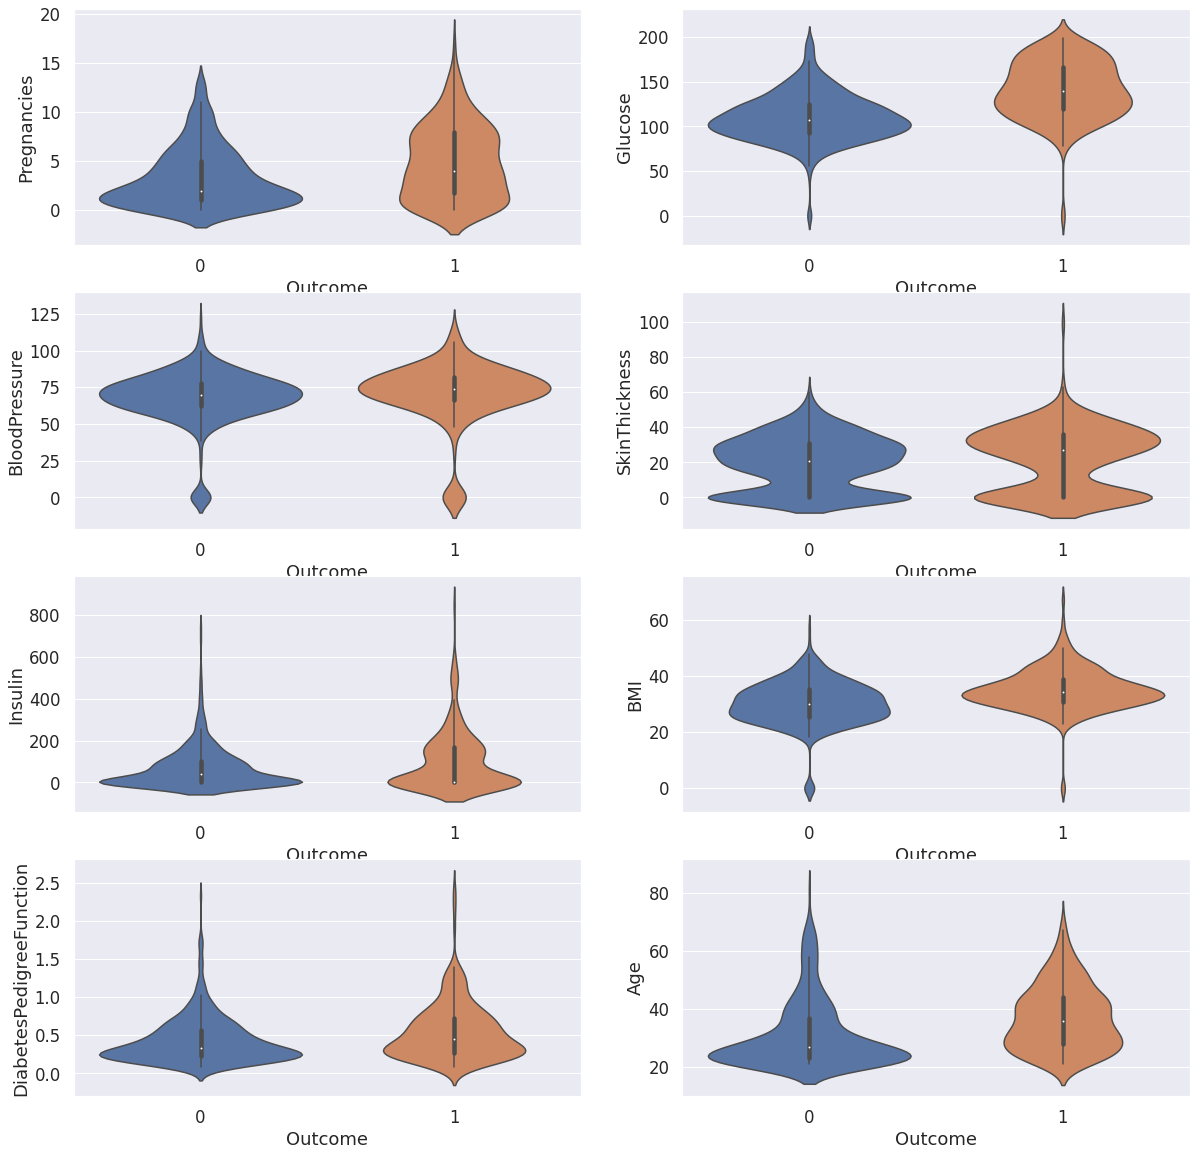

time: 1.42 s (started: 2021-05-20 19:24:17 +00:00)


In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=raw_data.Outcome ,y=raw_data.Pregnancies, ax=axes[0,0])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.Glucose, ax=axes[0,1])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.BloodPressure, ax=axes[1,0])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.SkinThickness, ax=axes[1,1])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.Insulin, ax=axes[2,0])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.BMI, ax=axes[2,1])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=raw_data.Outcome ,y=raw_data.Age, ax=axes[3,1])

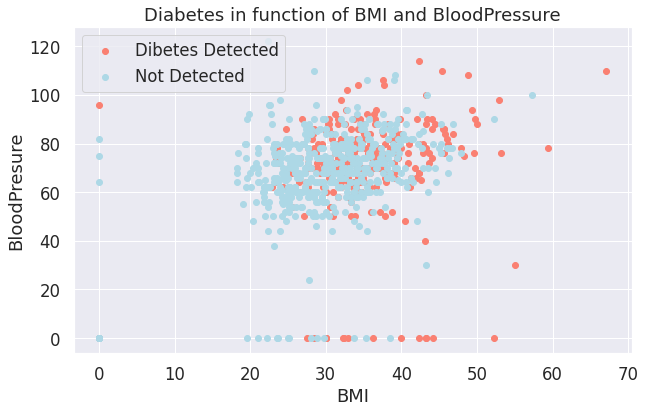

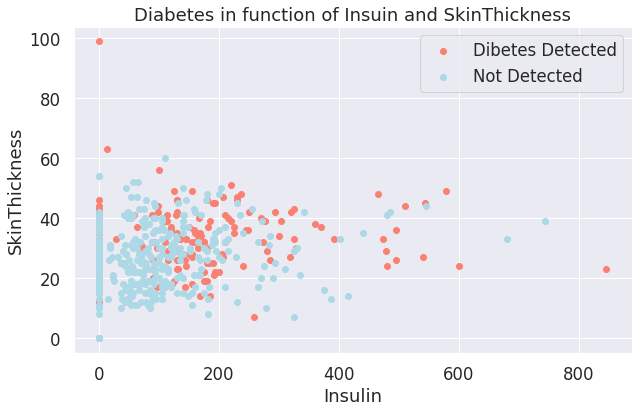

time: 796 ms (started: 2021-05-20 19:07:02 +00:00)


In [ ]:
# Figure for BMI vs BloodPressure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(raw_data["BMI"][raw_data["Outcome"]==1], raw_data["BloodPressure"][raw_data["Outcome"]==1], c="salmon")

# Scatter with negative examples
plt.scatter(raw_data["BMI"][raw_data["Outcome"]==0], raw_data["BloodPressure"][raw_data["Outcome"]==0], c="lightblue")

# Add some helpful info
plt.title("Diabetes in function of BMI and BloodPressure")
plt.xlabel("BMI")
plt.ylabel("BloodPresure")
plt.legend(["Dibetes Detected", "Not Detected"]);



# Figure for Insulin vs SkinThikness
plt.figure(figsize=(10, 6))

# Scatter with positive & negative examples
plt.scatter(raw_data["Insulin"][raw_data["Outcome"]==1], raw_data["SkinThickness"][raw_data["Outcome"]==1], c="salmon")
plt.scatter(raw_data["Insulin"][raw_data["Outcome"]==0], raw_data["SkinThickness"][raw_data["Outcome"]==0], c="lightblue")

# Some helpful labeling
plt.title("Diabetes in function of Insuin and SkinThickness")
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.legend(["Diabetes Detected", "Not Detected"]);

### Neural Network Model

In [ ]:
# Split data into X and y (for training)
X = raw_data.drop("Outcome", axis=1)
y = raw_data["Outcome"]

time: 3.4 ms (started: 2021-05-20 18:11:52 +00:00)


Splitting data into train & test set (with 15% of the data on test set, 15% on dev set and 70% on train set) and normalizing training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

time: 16.7 ms (started: 2021-05-20 19:32:31 +00:00)


We are going to use a very simple Neural Network Model with a input layer, 2 hidden layers with a dropout layer in between them and an output layer.

* 1st layer (Input Layer) - a dense neural network layer that takes initial input and puts it through 30 neurons (activation function - tanh)

* 2nd layer (1st hidden layer) - a dense neural network layer with 20 neurons (activation function - tanh)

* 3rd layer - Batch normalization layer 

* 4rd layer (Dropout layer) - dropout layer with 1% dropout rate

* 5nd layer (2st hidden layer) - a dense neural network layer with 20 neurons (activation function - tanh)

* 6th layer (output layer) - takes in 20 input from the previous layer and puts it through a single neuron with sigmoid activation function to provide prediction

Declaring model

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=8, activation='tanh'))
#model.add(BatchNormalization())
model.add(Dense(20, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(20, activation='tanh'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

time: 71 ms (started: 2021-05-20 20:02:40 +00:00)


Compiling and training model

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_dev, y_dev), callbacks=[early_stopping])

Epoch 1/250
17/17 [==============================] - 1s 17ms/step - loss: 0.7030 - accuracy: 0.5343 - val_loss: 0.6192 - val_accuracy: 0.7130
Epoch 2/250
17/17 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.6456 - val_loss: 0.6065 - val_accuracy: 0.7130
Epoch 3/250
17/17 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6902 - val_loss: 0.6037 - val_accuracy: 0.7130
Epoch 4/250
17/17 [==============================] - 0s 5ms/step - loss: 0.5942 - accuracy: 0.6783 - val_loss: 0.5972 - val_accuracy: 0.7130
Epoch 5/250
17/17 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6663 - val_loss: 0.5905 - val_accuracy: 0.7130
Epoch 6/250
17/17 [==============================] - 0s 4ms/step - loss: 0.5879 - accuracy: 0.6666 - val_loss: 0.5894 - val_accuracy: 0.6957
Epoch 7/250
17/17 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6772 - val_loss: 0.5880 - val_accuracy: 0.6957
Epoch 8/250


time: 11.9 s (started: 2021-05-20 20:02:42 +00:00)


In [ ]:
model.summary()
score = model.evaluate(X_test, y_test)
print('Model Accuracy = ',score[1])

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 30)                270       
_________________________________________________________________
batch_normalization_33 (Batc (None, 30)                120       
_________________________________________________________________
dense_123 (Dense)            (None, 20)                620       
_________________________________________________________________
batch_normalization_34 (Batc (None, 20)                80        
_________________________________________________________________
dropout_26 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_125 (Dense)            (None, 1)               

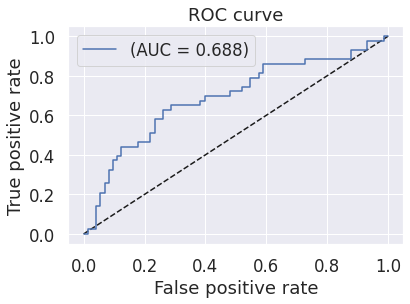

time: 412 ms (started: 2021-05-20 20:03:04 +00:00)


In [ ]:
y_pred = model.predict(X_test).ravel()

#Finding ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

# Calculating AUC
auc_nn = auc(false_positive_rate, true_positive_rate)

# plotting ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='(AUC = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

[[64  9]
 [24 19]]


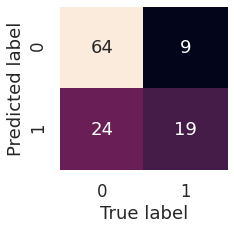

time: 168 ms (started: 2021-05-20 20:03:17 +00:00)


In [ ]:
#The prediction is given on probabilties, like 40% (0.4) or 80% (0.8) probabilities of having diabetes. We will need to make the numbers (o.4, 0.8) 0 and 1 for binary class classification first
pred = []
for i in y_pred:
  if i > 0.5:
    pred.append(1)
  else:
    pred.append(0)


#Caculating and prinintng the values of confusion matrix
print(confusion_matrix(y_test, pred))

#plotting confusing matrix nicely
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim()
    
plot_conf_mat(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        73
           1       0.68      0.44      0.54        43

    accuracy                           0.72       116
   macro avg       0.70      0.66      0.67       116
weighted avg       0.71      0.72      0.70       116

time: 13.1 ms (started: 2021-05-20 20:03:26 +00:00)
